# **Campaign Response Prediction**


## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## Reading and understanding the data

In [ ]:

# Reading and understanding the data

df = pd.read_csv('campaign_responses.csv')
print(f"Dataset Shape: {df.shape}")


Dataset Shape: (56, 9)


In [ ]:
df.head()

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,1,35,Male,65000,720,Yes,Married,2,Yes
1,2,28,Female,45000,680,No,Single,0,No
2,3,42,Male,85000,750,Yes,Married,3,Yes
3,4,31,Female,55000,710,Yes,Single,1,No
4,5,47,Male,95000,790,Yes,Married,2,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     56 non-null     int64 
 1   age             56 non-null     int64 
 2   gender          56 non-null     object
 3   annual_income   56 non-null     int64 
 4   credit_score    56 non-null     int64 
 5   employed        56 non-null     object
 6   marital_status  56 non-null     object
 7   no_of_children  56 non-null     int64 
 8   responded       56 non-null     object
dtypes: int64(5), object(4)
memory usage: 4.1+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,56.0,28.500000,16.309506,1.0,14.75,28.5,42.25,56.0
age,56.0,36.214286,7.088311,25.0,30.00,35.5,42.00,51.0
annual_income,56.0,69017.857143,22784.756524,35000.0,48000.00,64500.0,90000.00,110000.0
credit_score,56.0,719.107143,60.340753,600.0,677.50,720.0,770.00,820.0
no_of_children,56.0,1.285714,1.186504,0.0,0.00,1.0,2.00,3.0


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
gender,56,2,Male,28
employed,56,2,Yes,43
marital_status,56,2,Married,28
responded,56,2,Yes,28


###Checking for Duplicates - No duplicates Found

In [ ]:
#Checking for Duplicates - No duplicates found
duplicates = df.duplicated().sum()

###Checking for Nulls - No Null Values

In [ ]:
#Checking for Nulls - No Null Values
nulls = df.isnull().sum()

In [ ]:
# Dropping the customer_id column as it does not have any significance for model training
df.drop('customer_id', axis=1, inplace=True)

In [ ]:
df.head()

,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,35,Male,65000,720,Yes,Married,2,Yes
1,28,Female,45000,680,No,Single,0,No
2,42,Male,85000,750,Yes,Married,3,Yes
3,31,Female,55000,710,Yes,Single,1,No
4,47,Male,95000,790,Yes,Married,2,Yes


In [ ]:
# Identifying numerical and categorical columns
numerical_columns = df.select_dtypes(include=np.number).columns
categorical_columns = df.select_dtypes(exclude=np.number).columns
print(f"Numerical Columns: {numerical_columns}")
print(f"Categorical Columns: {categorical_columns}")

Numerical Columns: Index(['age', 'annual_income', 'credit_score', 'no_of_children'], dtype='object')
Categorical Columns: Index(['gender', 'employed', 'marital_status', 'responded'], dtype='object')


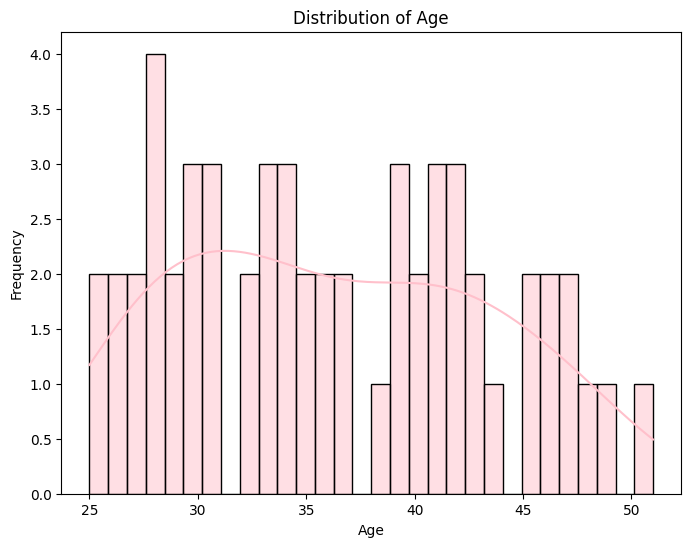

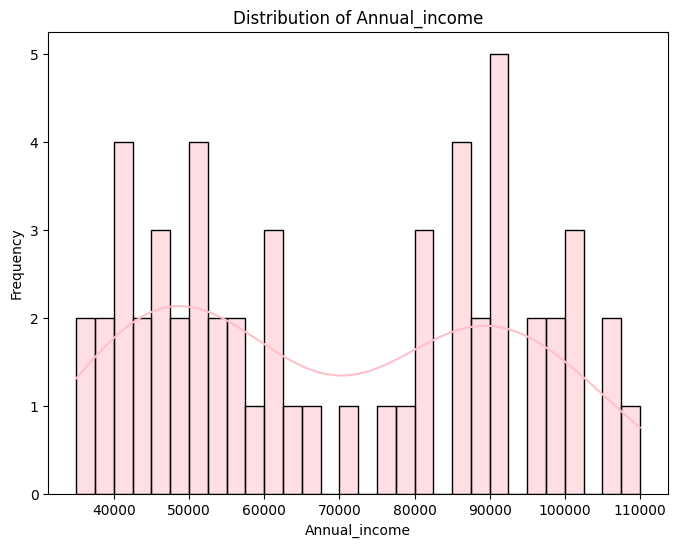

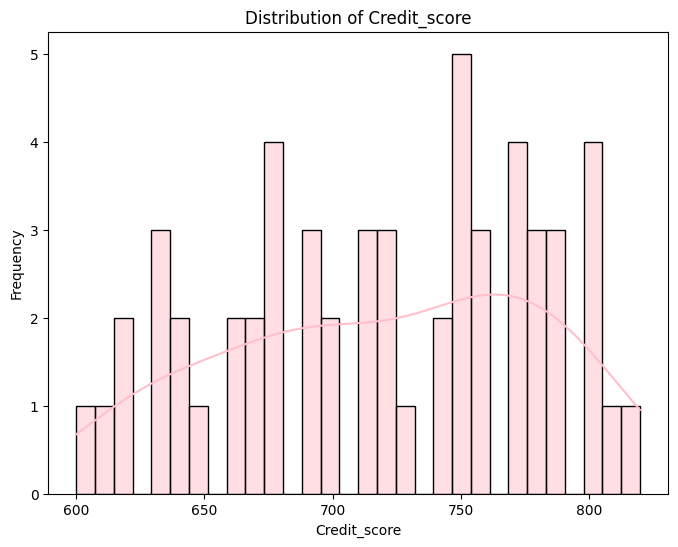

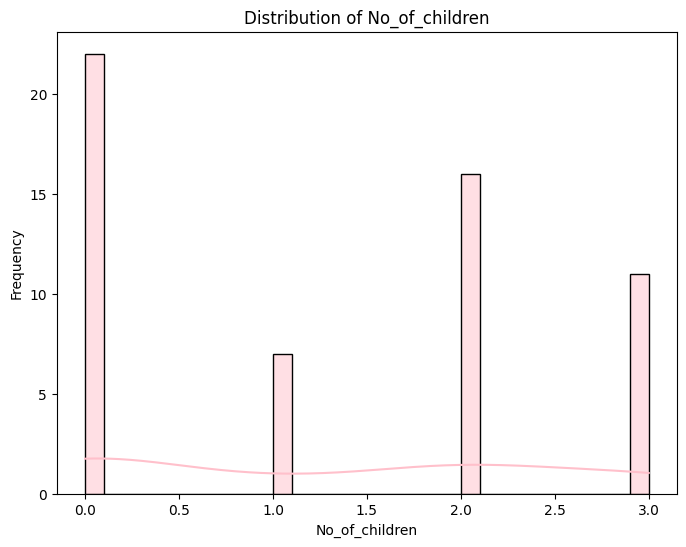

In [ ]:
# Plotting distributions of numerical features
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='pink', bins=30)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.show()

**Inference:** The histograms reveal that:
- The 'age' feature is right-skewed, with most individuals being younger.
- 'credit_score' and 'no_of_children' are discrete, and 'no_of_children' has a limited range of values.

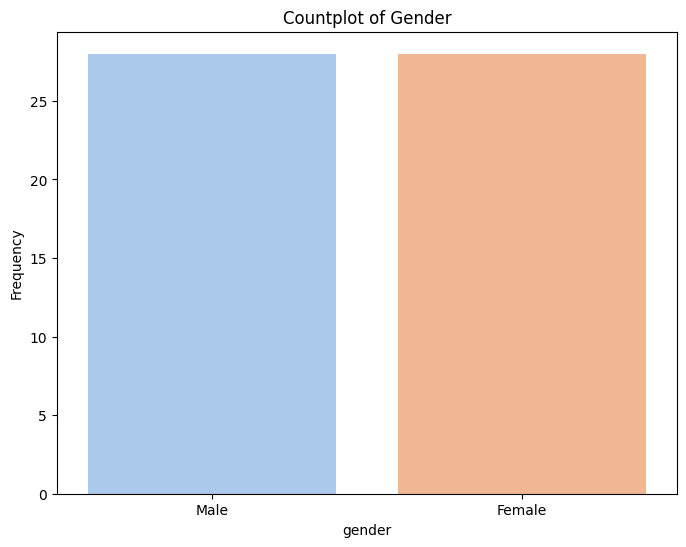

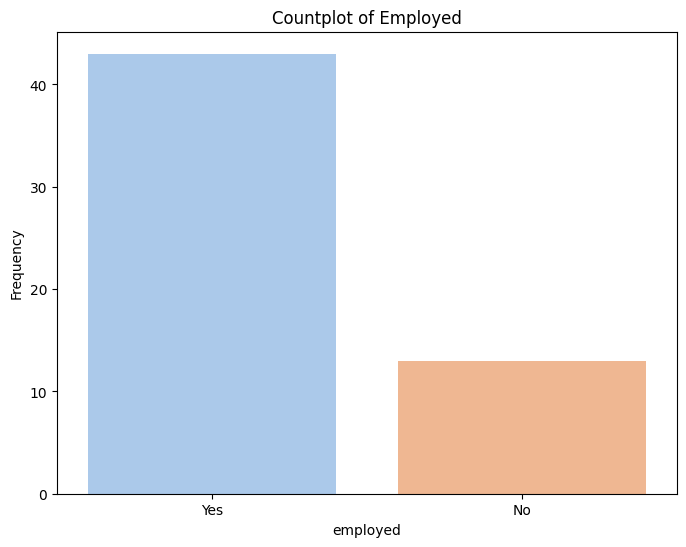

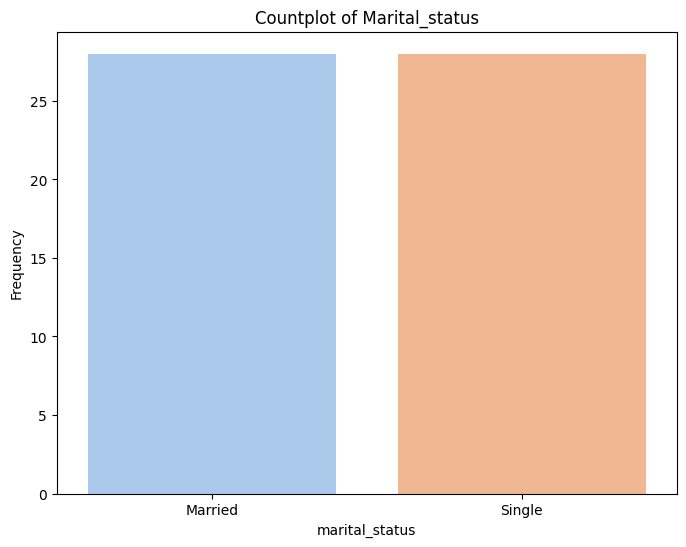

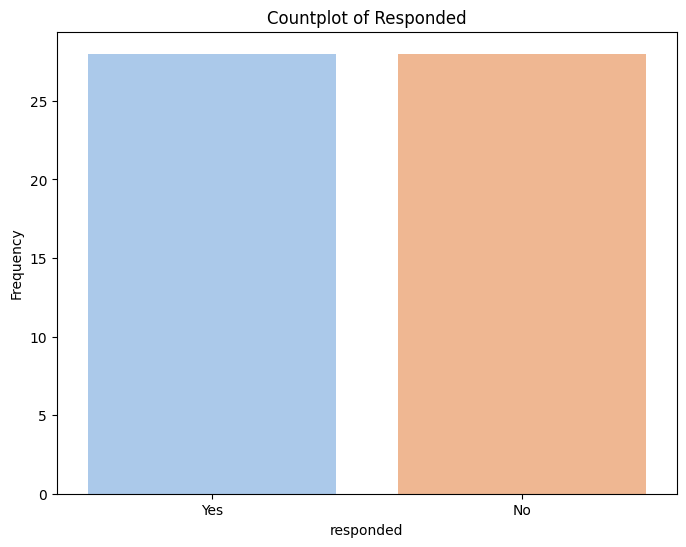

In [ ]:

# Plotting count plots for categorical features
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Countplot of {col.capitalize()}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

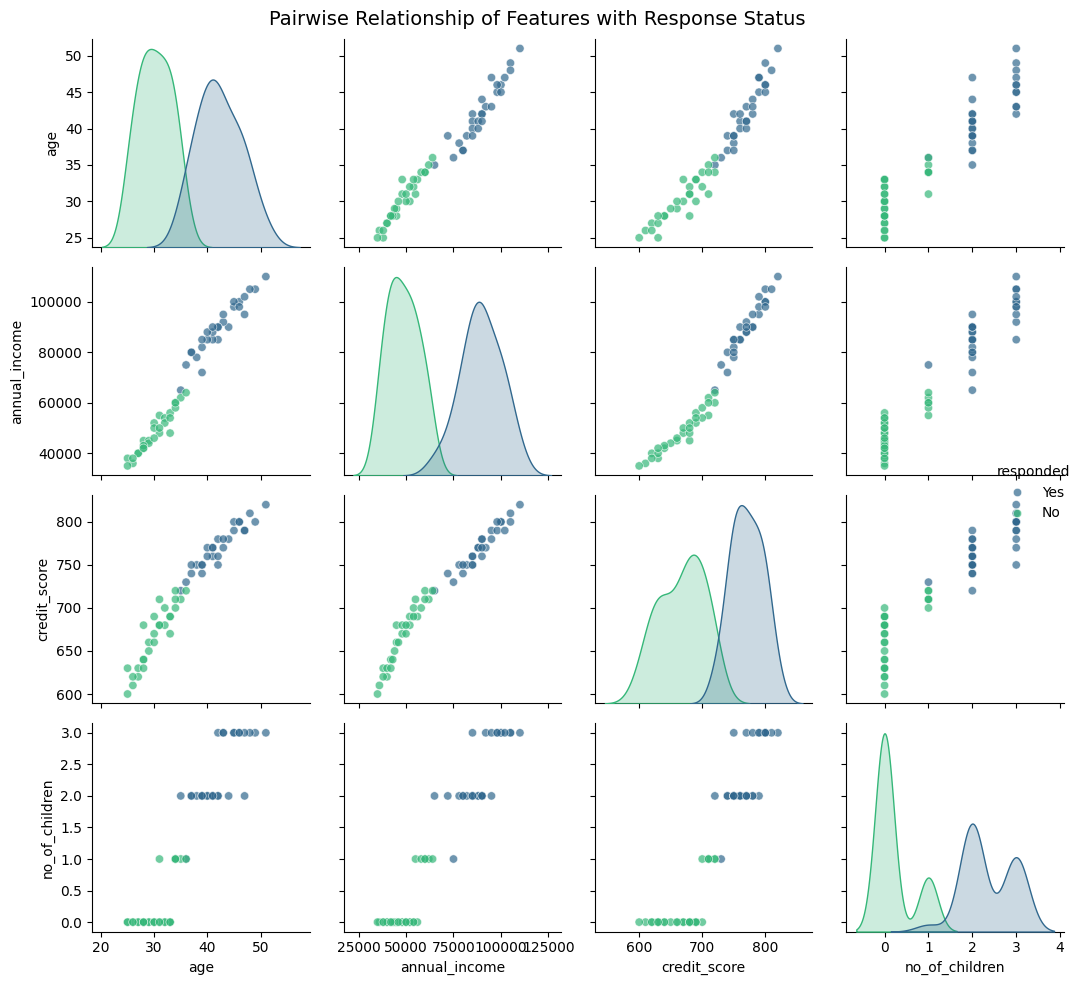

In [ ]:
# Pairplot to visualize relationships between features and response variable
features = ['age', 'annual_income', 'credit_score', 'no_of_children', 'responded']
sns.pairplot(df[features], hue='responded', palette='viridis', plot_kws={'alpha': 0.7})
plt.suptitle('Pairwise Relationship of Features with Response Status', size=14)
plt.tight_layout()
plt.show()


 **Inference:**
- A higher 'age' and 'annual_income' are positively correlated with the 'responded' feature.
- Higher 'credit_score' increases the likelihood of responding.
- 'no_of_children' distribution appears almost identical across both response groups.

###Outlier Analysis

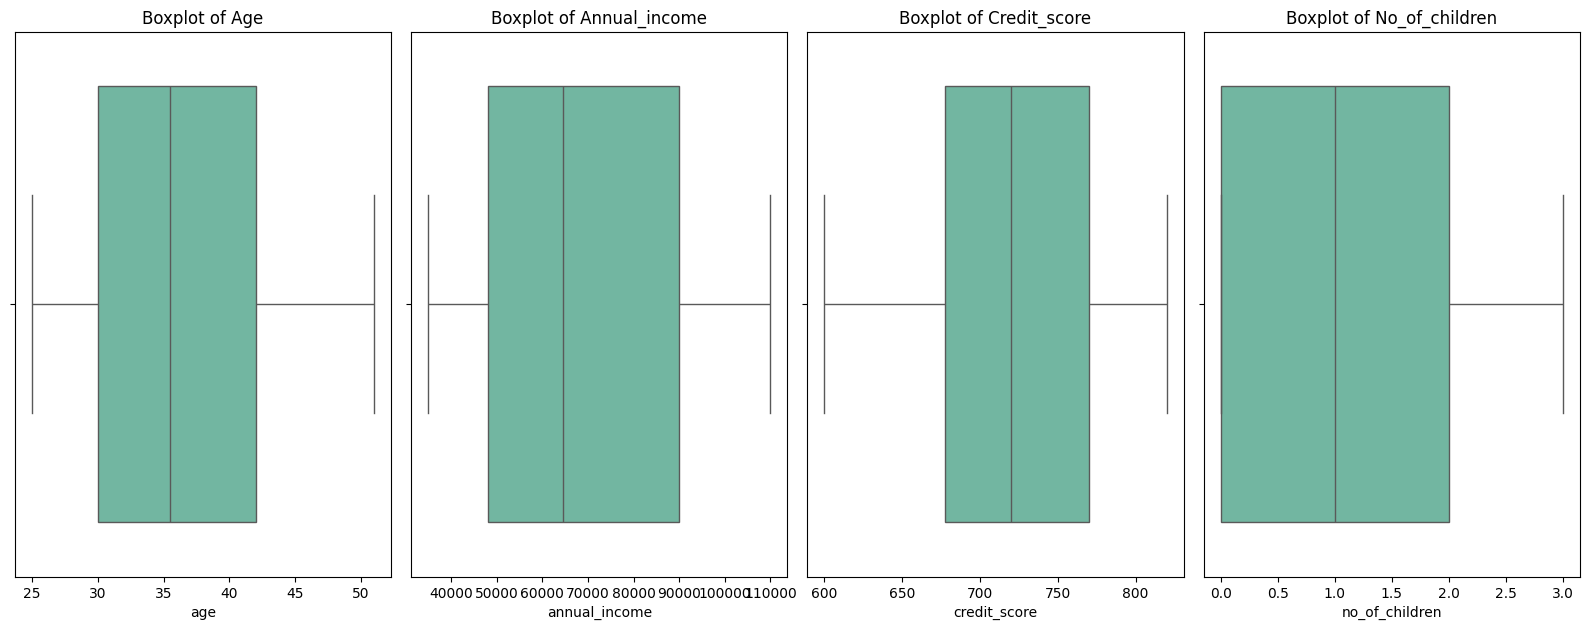

In [ ]:
plt.figure(figsize=(16, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[column], palette='Set2')
    plt.title(f'Boxplot of {column.capitalize()}')
plt.tight_layout()
plt.show()

 **Inference:** No significant outliers detected in the numerical features.

###Feature Construction

In [ ]:
# Adding new features like family_size and years_to_retirement
df['family_size'] = 1 + df['no_of_children'] + df['marital_status'].apply(lambda x: 1 if x == "Married" else 0)
df['years_to_retirement'] = 60 - df['age']

# Displaying the first few rows of the modified dataset
df.head()

,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded,family_size,years_to_retirement
0,35,Male,65000,720,Yes,Married,2,Yes,4,25
1,28,Female,45000,680,No,Single,0,No,1,32
2,42,Male,85000,750,Yes,Married,3,Yes,5,18
3,31,Female,55000,710,Yes,Single,1,No,2,29
4,47,Male,95000,790,Yes,Married,2,Yes,4,13


###Models

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# Encoding the 'responded' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['responded'] = le.fit_transform(df['responded'])

# Defining preprocessor steps
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'), ['marital_status', 'employed', 'gender']),
    ('ss', StandardScaler(), ['age', 'annual_income', 'credit_score', 'years_to_retirement'])
], remainder='passthrough')

# Applying the preprocessor transformations
df_processed = preprocessor.fit_transform(df)

# Converting the result back into a DataFrame
df_transformed = pd.DataFrame(df_processed, columns=preprocessor.get_feature_names_out())

# Renaming columns for easier interpretation
df_transformed.columns = df_transformed.columns.str.replace('ohe__', '').str.replace('ss__', '').str.replace('_Single', '').str.replace('_Yes', '').str.replace('_Male', '')

###Correlation Analysis

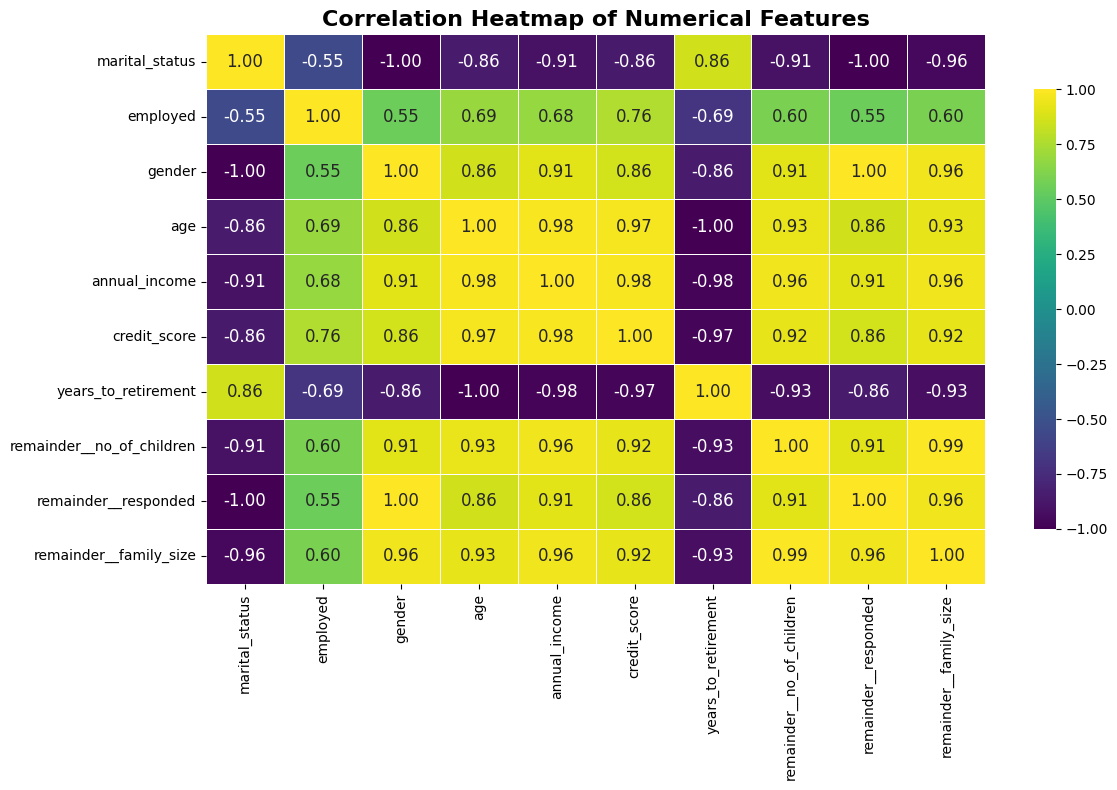

In [ ]:
# Correlation Analysis
correlation_matrix = df_transformed.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='viridis', cbar_kws={'shrink': 0.8}, annot_kws={'size': 12}, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', size=16, weight='bold')
plt.tight_layout()
plt.show()


**Inference:**
- Strong positive correlation between 'gender', 'age', 'annual_income', and 'credit_score', which indicates that individuals with higher income and credit scores tend to be more likely to respond.

## Model Building, Training and Evaluation

In [ ]:
df_transformed.head()

,marital_status,employed,gender,age,annual_income,credit_score,years_to_retirement,remainder__no_of_children,remainder__responded,remainder__family_size
0,0.0,1.0,1.0,-0.172859,-0.177936,0.014931,0.172859,2.0,1.0,4.0
1,1.0,0.0,0.0,-1.169337,-1.063659,-0.653970,1.169337,0.0,0.0,1.0
2,0.0,1.0,1.0,0.823620,0.707788,0.516607,-0.823620,3.0,1.0,5.0
3,1.0,1.0,0.0,-0.742275,-0.620797,-0.152294,0.742275,1.0,0.0,2.0
4,0.0,1.0,1.0,1.535390,1.150650,1.185508,-1.535390,2.0,1.0,4.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Splitting the dataset into features and target variable
X = df_transformed.drop('remainder__responded', axis=1)
y = df_transformed['remainder__responded']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

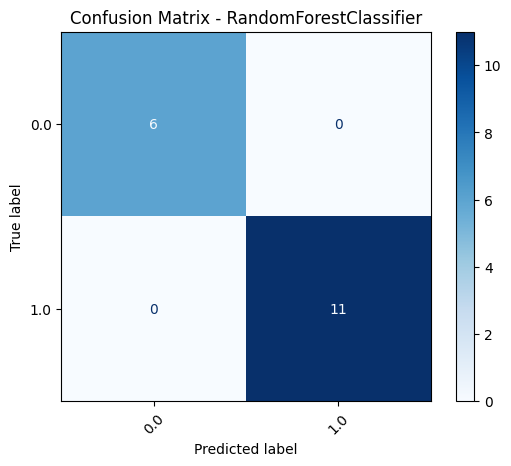

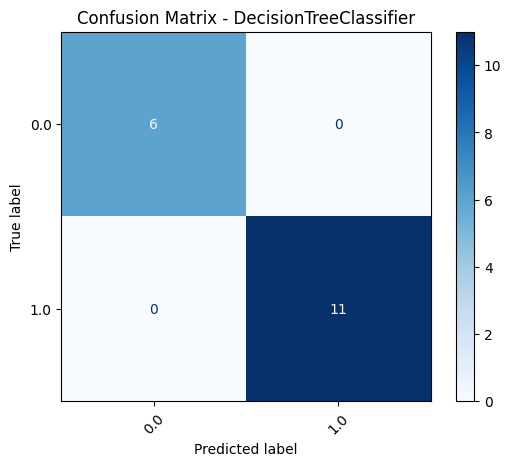

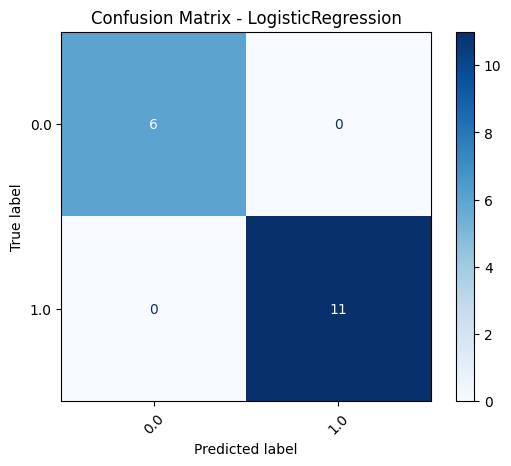

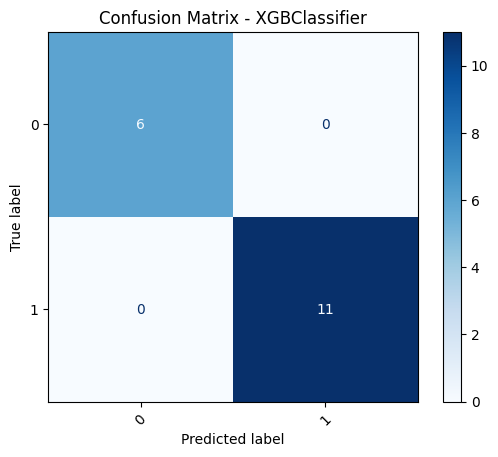

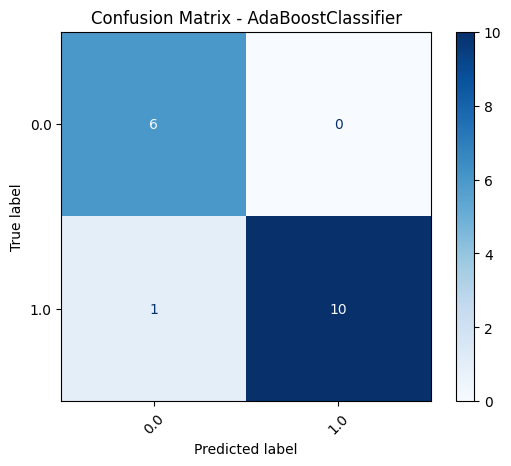

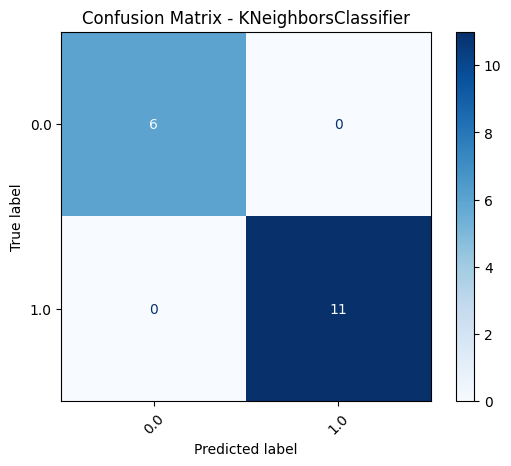

                    model                                        best_params  \
0  RandomForestClassifier            {'max_depth': None, 'n_estimators': 50}   
1  DecisionTreeClassifier           {'criterion': 'gini', 'max_depth': None}   
2      LogisticRegression                        {'C': 0.1, 'penalty': 'l2'}   
3           XGBClassifier  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...   
4      AdaBoostClassifier         {'learning_rate': 0.1, 'n_estimators': 50}   
5    KNeighborsClassifier  {'metric': 'euclidean', 'n_neighbors': 3, 'wei...   

   best_score  accuracy  precision  recall    f1  
0         1.0      1.00       1.00    1.00  1.00  
1         1.0      1.00       1.00    1.00  1.00  
2         1.0      1.00       1.00    1.00  1.00  
3         1.0      1.00       1.00    1.00  1.00  
4         1.0      0.94       0.95    0.94  0.94  
5         1.0      1.00       1.00    1.00  1.00  


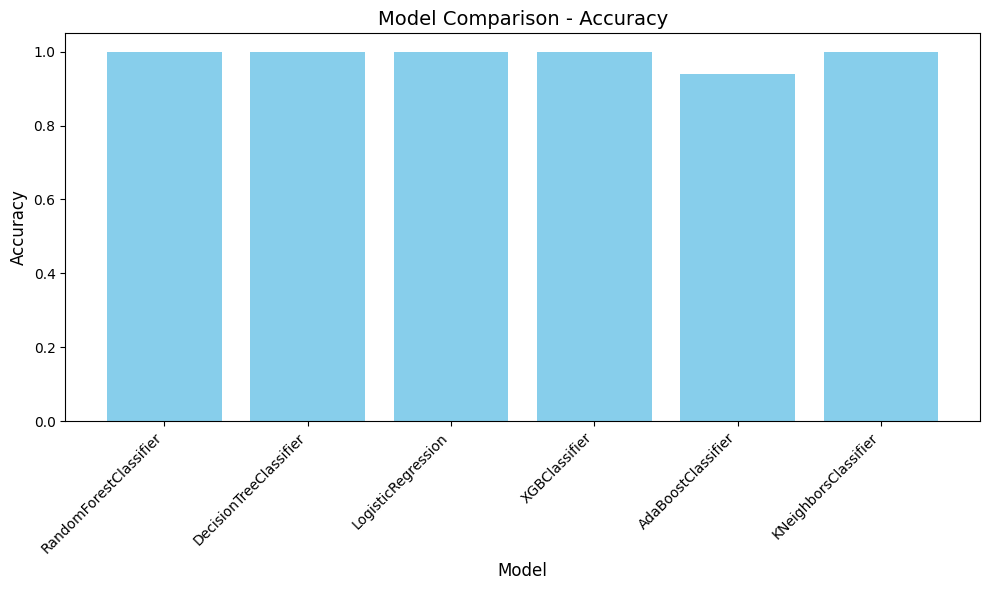

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Defining the models and hyperparameters for GridSearchCV
models_and_params = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 150, 200],
            'max_depth': [None, 5, 10, 15],
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 5, 10],
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'penalty': ['l1', 'l2'],
            'C': [0.1, 1, 10],
        }
    },
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    },
    'AdaBoostClassifier': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.1, 1, 2],
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'metric': ['euclidean', 'manhattan'],
            'weights': ['uniform', 'distance'],
        }
    }
}

# Store results of model performance
results = []

# GridSearchCV for each model
for model_name, model_info in models_and_params.items():
    model = model_info['model']
    params = model_info['params']

    grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results.append({
        'model': model_name,
        'best_params': grid.best_params_,
        'best_score': grid.best_score_,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    })

    # Plot confusion matrix for each model
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.best_estimator_.classes_)
    cm_display.plot(cmap='Blues', values_format='d', xticks_rotation=45)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Round the numerical values to 2 decimal places
results_df = results_df.round({'best_score': 2, 'accuracy': 2, 'precision': 2, 'recall': 2, 'f1': 2})

# Print the DataFrame for a comparison of model performances
print(results_df[['model', 'best_params', 'best_score', 'accuracy', 'precision', 'recall', 'f1']])

# Plot a comparison of model accuracies
plt.figure(figsize=(10, 6))
plt.bar(results_df['model'], results_df['accuracy'], color='skyblue')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Comparison - Accuracy', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Conclusion

The results from the GridSearchCV and evaluation of multiple machine learning models demonstrate exceptional performance across all models tested. Each model was optimized with a set of hyperparameters, and the following key observations can be drawn from the results:

1. **High Accuracy**: All models except for the AdaBoost classifier achieved a perfect accuracy score of 1.00, indicating excellent model performance in terms of correctly classifying the test data. This suggests that the models are well-suited for the given dataset.
   
2. **Precision, Recall, and F1 Score**: Similarly, all models except AdaBoost achieved perfect scores for precision, recall, and F1, reflecting not only their ability to classify correctly but also their ability to maintain consistency across both the true positive and false positive classes.

3. **AdaBoost Classifier**: Although the AdaBoost classifier performed slightly lower than the others, with an accuracy of 0.94 and corresponding precision, recall, and F1 scores slightly lower than 1.00, it still performed well in terms of overall classification. This suggests that AdaBoost might require further fine-tuning or adjustments in hyperparameters for better performance.

4. **Best Parameters**: The hyperparameters selected for the best performing models (such as 'max_depth': None, 'n_estimators': 50 for RandomForestClassifier, and 'penalty': 'l2', 'C': 0.1 for LogisticRegression) reflect the importance of optimizing these settings for each model. The optimal hyperparameter values allowed the models to perform at their peak.

### Model Comparison

From the performance metrics (accuracy, precision, recall, and F1 score), it is clear that the RandomForestClassifier, DecisionTreeClassifier, LogisticRegression, XGBClassifier, and KNeighborsClassifier achieved identical results, performing with perfect accuracy and other metrics.

While the AdaBoostClassifier showed slightly less optimal results, it still remains a strong candidate for classification tasks and could benefit from further optimization.

Overall, these results demonstrate that these models are well-suited for the classification problem at hand, with most models achieving perfect classification performance.

# Overfitting ?

Yes, the model performance showing 100% accuracy across all evaluation metrics (accuracy, precision, recall, F1 score) could indicate overfitting, especially if the data used for training and testing is not sufficiently varied or the model is overly complex for the dataset.

Here are a few possible explanations for overfitting:

1. **Perfect Accuracy**: Achieving 100% accuracy can be a sign that the model has memorized the training data, meaning it might not generalize well to new, unseen data. This can happen if the model is too complex relative to the size and diversity of the dataset.

2. **Small or Simple Dataset**: If the dataset is small or not representative of real-world data, the model might perform well during training and testing but fail in practical applications where data varies more.

3. **Model Complexity**: Some models, like Random Forest or Decision Trees, can easily overfit if their hyperparameters are not well-tuned (e.g., too many estimators or overly deep trees), leading to high performance on training and test data but poor generalization.

### How to Detect Overfitting
To confirm if the model is overfitting:
1. **Cross-Validation**: Use k-fold cross-validation to evaluate the model on multiple splits of the data. If the accuracy fluctuates significantly between the training and validation sets, it's a sign of overfitting.
   
2. **Validation Set Performance**: Check the model’s performance on a validation set or new test data that was not used during training. If the accuracy drops significantly, it's an indication of overfitting.

3. **Learning Curves**: Plot learning curves (training vs. validation accuracy) to see if the model’s performance on the validation data stagnates or drops while training accuracy continues to improve.

### Addressing Overfitting:
- **Regularization**: Apply regularization techniques such as L1 (Lasso) or L2 (Ridge) regularization to reduce model complexity.
- **Reduce Model Complexity**: Tune hyperparameters like max depth or number of estimators for tree-based models to prevent them from growing too complex.
- **Cross-Validation**: Use cross-validation or hold-out validation sets to ensure the model's robustness.
- **More Data**: Increasing the amount of training data can help the model generalize better.
- **Ensemble Methods**: Combine different models or use techniques like dropout or bagging/boosting to reduce overfitting.

If the model performs similarly well on new, unseen data, then it might not be overfitting, but you should validate this with the methods mentioned above.